In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Graficos para los tamaños de avalancha (size), columna 2 de los ficheros AdditionData

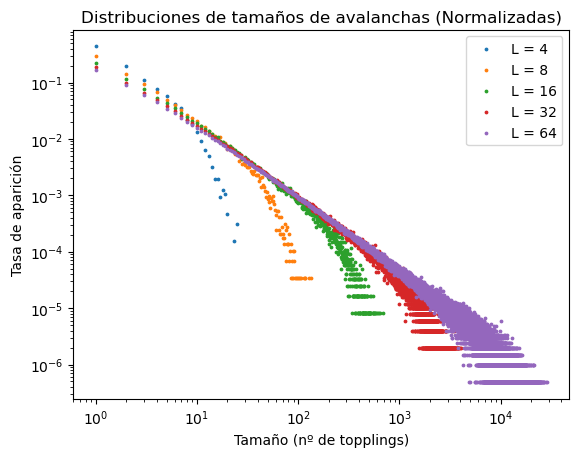

In [4]:
l = [4, 8, 16, 32, 64]
for k in l:
    data = np.loadtxt("Datos\sim002\AdditionData_limit3_statistic1000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,1],int(np.max(data[:,1])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de tamaños de avalanchas (Normalizadas)")
plt.xlabel("Tamaño (nº de topplings)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Graficos para las duraciones de avalancha, columna 3 de los ficheros AdditionData

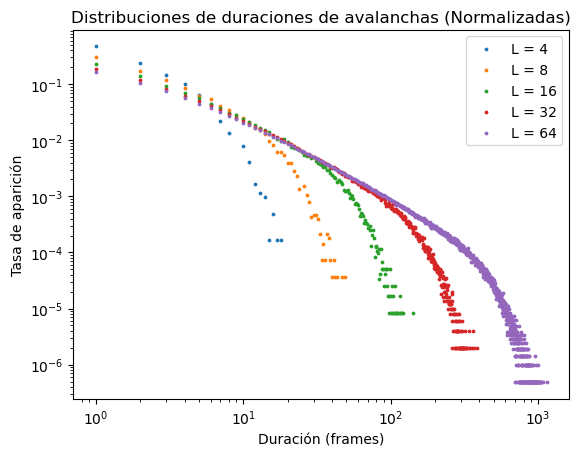

In [6]:
l = [4, 8, 16, 32, 64]
for k in l:
    data = np.loadtxt("Datos\sim002\AdditionData_limit3_statistic1000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,2],int(np.max(data[:,2])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de duraciones de avalanchas (Normalizadas)")
plt.xlabel("Duración (frames)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Grafica para las areas cubiertas por las avalanchas, columna 4 de los ficheros AdditionData

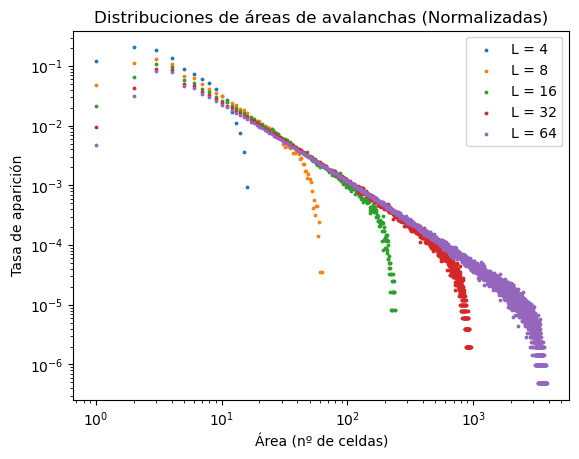

In [7]:
l = [4, 8, 16, 32, 64]
for k in l:
    data = np.loadtxt("Datos\sim002\AdditionData_limit3_statistic1000_"+str(k)+"x"+str(k)+".dat", delimiter=",", dtype=int)
    data = data[ data[:,1]>0]
    y = np.histogram(data[:,3],int(np.max(data[:,3])), density=True)[0]
    x = np.linspace(1, y.size, y.size)
    plt.scatter(x, y, s=3, label="L = "+str(k))

plt.yscale("log")
plt.xscale("log")
plt.title("Distribuciones de áreas de avalanchas (Normalizadas)")
plt.xlabel("Área (nº de celdas)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()

Obtención de la pendiente (Exponente):

Pendiente: [-1.37782004]
Ord. origen: -0.4310846053072108
R^2: 0.9963730308302884


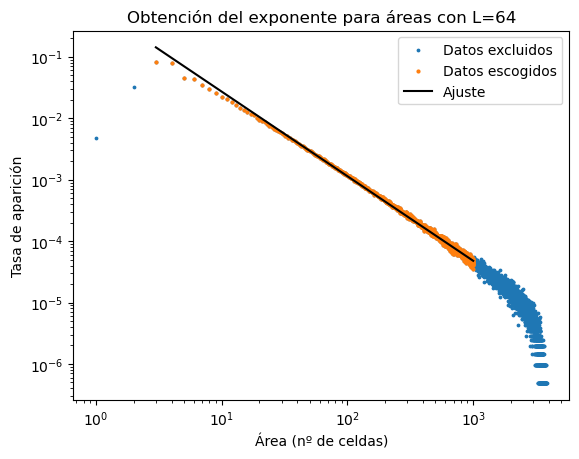

In [9]:
data = np.loadtxt("Datos\sim002\AdditionData_limit3_statistic1000_64x64.dat", delimiter=",", dtype=int)
data = data[ data[:,1]>0]
y = np.histogram(data[:,3],int(np.max(data[:,3])), density=True)[0]
x = np.linspace(1, y.size, y.size)
plt.scatter(x, y, s=3, label="Datos excluidos") #Powerlaw plot

linRegData = y[2:1000]
linRegX = x[2:1000]
plt.scatter(linRegX,linRegData, s=4, label="Datos escogidos") #Powerlaw plot

regModel = LinearRegression()
regModel.fit(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData))

print("Pendiente:", regModel.coef_)
print("Ord. origen:", regModel.intercept_)
print("R^2:", regModel.score(X=np.log(linRegX.reshape(-1,1)), y=np.log(linRegData)))

plt.plot(linRegX, np.exp(regModel.intercept_)*linRegX**regModel.coef_,color="black", label="Ajuste")

plt.yscale("log")
plt.xscale("log")
plt.title("Obtención del exponente para áreas con L=64")
plt.xlabel("Área (nº de celdas)")
plt.ylabel("Tasa de aparición")
plt.legend()
plt.show()